# Phishing URL Detection

## Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initialisation

In [44]:
df_main = pd.read_csv('dataset.csv')
df_main.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [45]:
df_main.shape

(549346, 2)

### Duplicate Removal

In [46]:
df_main.drop_duplicates(inplace=True)
df_main.shape

(507196, 2)

### Dataset Balancing

In [47]:
df_good = df_main[df_main['Label']=='bad'].sample(100000,random_state=123)
df = pd.concat([df_good,df_main[df_main['Label']=='good'].sample(df_good.shape[0],random_state=123)],ignore_index=True)
df.shape

(200000, 2)

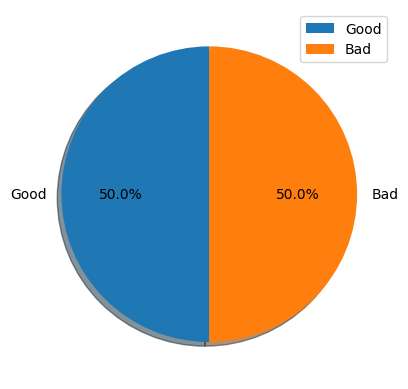

In [48]:
plt.pie(df['Label'].value_counts(),labels=['Good','Bad'],autopct='%1.1f%%',shadow=True, startangle=90)
plt.legend(loc='best')
plt.show()

### Label Encoding

In [49]:
df['Label'] = df['Label'].replace(to_replace=['good','bad'],value=[0,1])
df.sample(5)

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_19808\3477560693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace(to_replace=['good','bad'],value=[0,1])


,URL,Label
77771,worldssafest.com/sikiru/goog.com/googledocs1/i...,1
99847,www.paypal.com.22wzpdz1jihemg28upud.87azd7y2r6...,1
132724,www.grecobrothers.com/custom.htm,0
24708,safetycentere.juplo.com/please.php,1
27268,defenceinform.com/,1


## Preprocessing

### Add Fields

In [50]:
import re

def valid_ip(url):
    ipv4 = "^((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])\.){3}(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])$"
    ipv6 = "((([0-9a-fA-F]){1,4})\\:){7}"\
            "([0-9a-fA-F]){1,4}"
    return 1 if re.search(ipv4, url) or re.search(ipv6, url) else 0

def num_of_digits(url):
    dig=0
    for char in url:
        if char.isdigit():
            dig+=1
    return dig

def num_of_alpha(url):
    alpha=0
    for char in url:
        if char.isalpha():
            alpha+=1
    return alpha

symbols = ['#', '$', '%', '&', '*', '+', '/', ':', ';', '=', '?', '@', '//', '.']

df['URL'] = [re.sub('www.','',url) for url in df['URL']]
df['Length'] = [len(url) for url in df['URL']]
df['Is_IP'] = [valid_ip(url) for url in df['URL']]
df['Num_Digits'] = [num_of_digits(url) for url in df['URL']]
df['Num_Alphabets'] = [num_of_alpha(url) for url in df['URL']]
for symbol in symbols:
    df[symbol] = [url.count(symbol) for url in df['URL']]

df.head()

,URL,Label,Length,Is_IP,Num_Digits,Num_Alphabets,#,$,%,&,*,+,/,:,;,=,?,@,//,.
0,sywgy.com/templets/images/index.htm?hxxp:/us.b...,1,109,0,1,85,0,0,0,1,0,0,11,2,0,1,2,0,0,6
1,awesometime4you.com/wp-admin/js/cmfr/web/certi...,1,91,0,1,78,0,0,0,0,0,0,5,0,0,1,1,0,0,2
2,kf25zx.com/images/?us.battle.net/login/en,1,41,0,2,31,0,0,0,0,0,0,4,0,0,0,1,0,0,3
3,erlas.com.tr/wp-admin/user/GgG/google,1,37,0,0,30,0,0,0,0,0,0,4,0,0,0,0,0,0,2
4,bradescoatual.com/,1,18,0,0,16,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Check Shortening Service

In [51]:
def is_shortened(URL):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      URL)
    return 1 if match else 0

df['is_Shortened'] = [is_shortened(url) for url in df['URL']]
df.head()

,URL,Label,Length,Is_IP,Num_Digits,Num_Alphabets,#,$,%,&,...,+,/,:,;,=,?,@,//,.,is_Shortened
0,sywgy.com/templets/images/index.htm?hxxp:/us.b...,1,109,0,1,85,0,0,0,1,...,0,11,2,0,1,2,0,0,6,0
1,awesometime4you.com/wp-admin/js/cmfr/web/certi...,1,91,0,1,78,0,0,0,0,...,0,5,0,0,1,1,0,0,2,0
2,kf25zx.com/images/?us.battle.net/login/en,1,41,0,2,31,0,0,0,0,...,0,4,0,0,0,1,0,0,3,1
3,erlas.com.tr/wp-admin/user/GgG/google,1,37,0,0,30,0,0,0,0,...,0,4,0,0,0,0,0,0,2,0
4,bradescoatual.com/,1,18,0,0,16,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Hostname and Scheme Check

In [52]:
import urllib

def check_scheme(url):
    return 1 if urllib.parse.urlparse(url).scheme in ['http','https'] else 0
    
def check_hostname(url):
    return 1 if urllib.parse.urlparse(url).hostname else 0

df['is_Host'] = [check_hostname(url) for url in df['URL']]
df['is_HTTP'] = [check_scheme(url) for url in df['URL']]

df.head()

,URL,Label,Length,Is_IP,Num_Digits,Num_Alphabets,#,$,%,&,...,:,;,=,?,@,//,.,is_Shortened,is_Host,is_HTTP
0,sywgy.com/templets/images/index.htm?hxxp:/us.b...,1,109,0,1,85,0,0,0,1,...,2,0,1,2,0,0,6,0,0,0
1,awesometime4you.com/wp-admin/js/cmfr/web/certi...,1,91,0,1,78,0,0,0,0,...,0,0,1,1,0,0,2,0,0,0
2,kf25zx.com/images/?us.battle.net/login/en,1,41,0,2,31,0,0,0,0,...,0,0,0,1,0,0,3,1,0,0
3,erlas.com.tr/wp-admin/user/GgG/google,1,37,0,0,30,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,bradescoatual.com/,1,18,0,0,16,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Exploratory Analysis

### Bar Chart Analysis

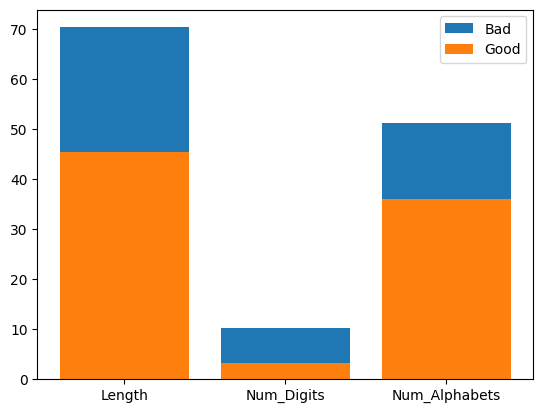

In [53]:
df_good = df[df['Label']==0]
df_bad = df[df['Label']==1]
list_good = [df_good[col].mean() for col in ['Length','Num_Digits','Num_Alphabets']]
list_bad = [df_bad[col].mean() for col in ['Length','Num_Digits','Num_Alphabets']]
plt.bar(['Length','Num_Digits','Num_Alphabets'],list_bad,label='Bad')
plt.bar(['Length','Num_Digits','Num_Alphabets'],list_good,label='Good')
plt.legend(loc='best')
plt.show()

### Correlation Heatmap 

<Axes: >

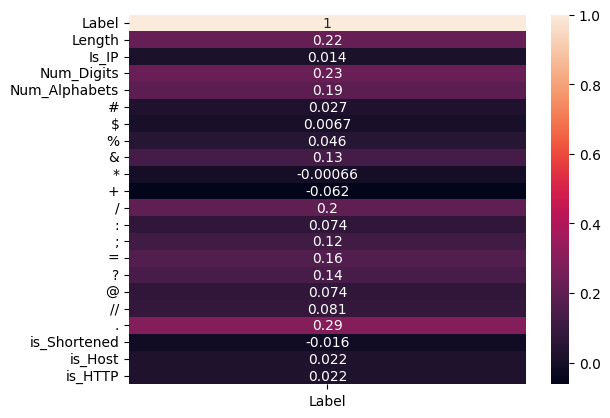

In [54]:
sns.heatmap(df.drop(['URL'],axis=1).corr()[0:1].T,annot=True)

### Pairplot

We plot only the top three values with highest correlation coefficient 

C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When gro

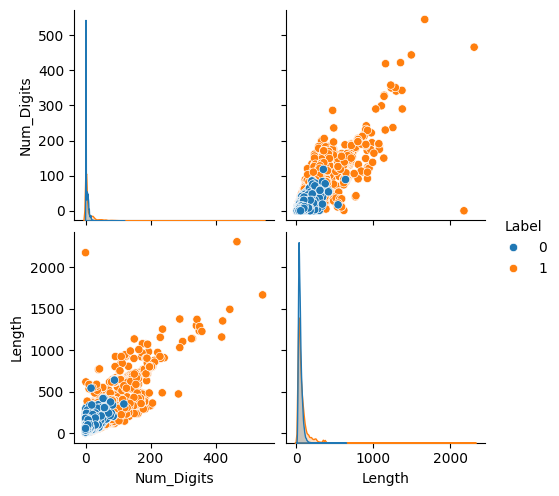

In [55]:
sns.pairplot(df[['Num_Digits','Length','Label']],hue='Label')

### Wordcloud - Safe Links

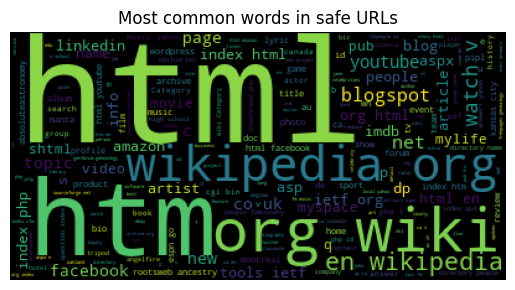

In [56]:
import wordcloud
wordcloud_safe = wordcloud.WordCloud().generate(' '.join(df_good['URL']))
plt.imshow(wordcloud_safe)
plt.title('Most common words in safe URLs')
plt.axis('off')
plt.show()

### Wordcloud - Unsafe Links

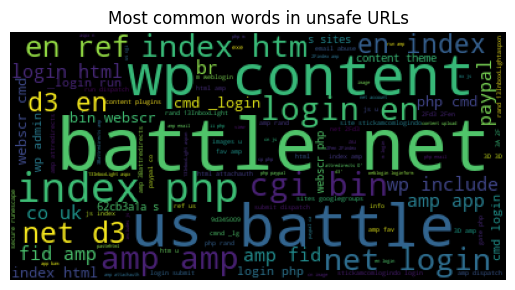

In [57]:
import wordcloud
wordcloud_unsafe = wordcloud.WordCloud().generate(' '.join(df_bad['URL']))
plt.imshow(wordcloud_unsafe)
plt.title('Most common words in unsafe URLs')
plt.axis('off')
plt.show()

### Length Distribution

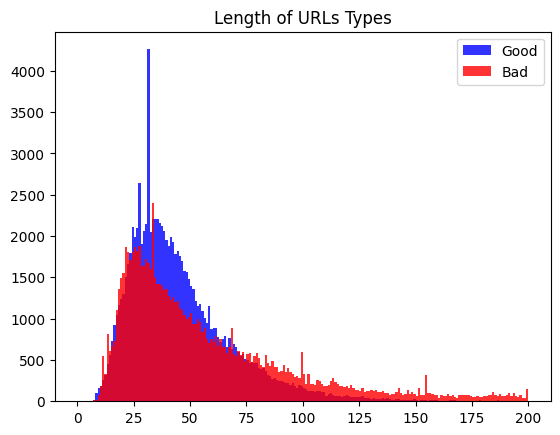

In [58]:
plt.hist(df_good['Length'],bins=200,label='Good',range=(0,200),color='blue',alpha=0.80)
plt.hist(df_bad['Length'],bins=200,label='Bad',range=(0,200),color='red',alpha=0.80)
plt.legend(loc='best')
plt.title('Length of URLs Types')
plt.show()

### Model Preparation

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(['URL','Label'],axis=1)
Y = df['Label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=123)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Performance - Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
model = RandomForestClassifier(random_state=123)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81     19969
           1       0.82      0.79      0.80     20031

    accuracy                           0.81     40000
   macro avg       0.81      0.81      0.81     40000
weighted avg       0.81      0.81      0.81     40000



### Model Performance - Multinomial Naive-Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
model = GaussianNB()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.99      0.70     19969
           1       0.94      0.17      0.29     20031

    accuracy                           0.58     40000
   macro avg       0.74      0.58      0.50     40000
weighted avg       0.74      0.58      0.49     40000



### Model Performance - XGBoost

In [62]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=123)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81     19969
           1       0.83      0.75      0.79     20031

    accuracy                           0.80     40000
   macro avg       0.80      0.80      0.80     40000
weighted avg       0.80      0.80      0.80     40000



### Model Performance - ANN 

In [63]:
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping 
from keras.optimizers import Adam

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1, mode='auto',min_delta=0.0001, baseline=None)

model = Sequential()
model.add(Dense(128,activation='sigmoid',input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train,Y_train,validation_split=0.2,epochs=100,batch_size=512,callbacks=[callback])

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5778 - accuracy: 0.6615 - val_loss: 0.5506 - val_accuracy: 0.6758
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5303 - accuracy: 0.7029 - val_loss: 0.4919 - val_accuracy: 0.7330
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.7475 - val_loss: 0.4667 - val_accuracy: 0.7653
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4597 - accuracy: 0.7637 - val_loss: 0.4506 - val_accuracy: 0.7704
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.7727 - val_loss: 0.4457 - val_accuracy: 0.7726
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.7762 - val_loss: 0.4400 - val_accuracy: 0.7753
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.7784 - val_loss: 0.4463 - val_accuracy: 0.7716

In [64]:
Y_prob = model.predict(X_test)
Y_pred = [1 if prob>0.5 else 0 for prob in Y_prob]
model.evaluate(X_test,Y_test)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.4024 - accuracy: 0.8005


[0.40241745114326477, 0.8005250096321106]

### Train-Test Comparision

In [65]:
train_eval = model.evaluate(X_train,Y_train)
test_eval = model.evaluate(X_test,Y_test)

1250/1250 [==============================] - 2s 2ms/step - loss: 0.4024 - accuracy: 0.8005


#### Accuracy Plots

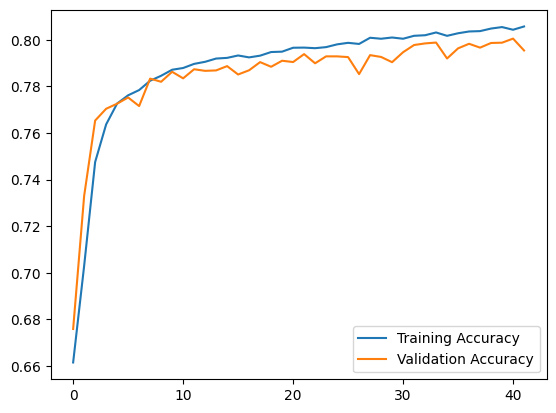

In [66]:
plt.plot(hist.history['accuracy'],label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

#### Loss Plots

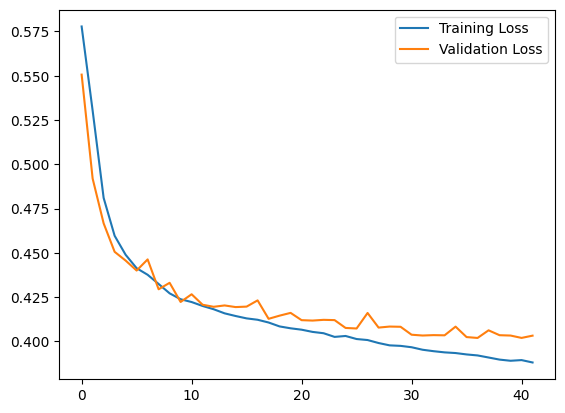

In [67]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend(loc='best')
plt.show()

### Confusion Matrix

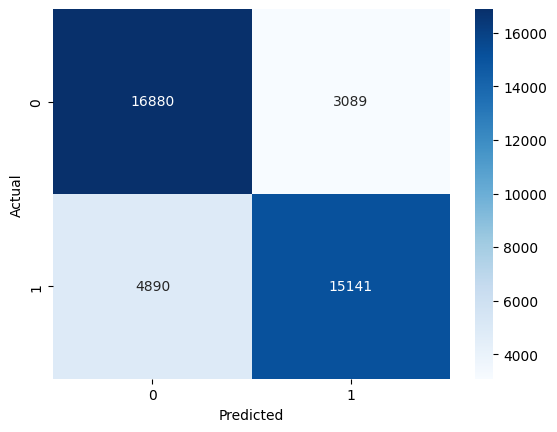

In [68]:
from tensorflow.math import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()